# Installing packages

In [ ]:
using Pkg
# Pkg.add("Plots")
# Pkg.add("MultivariateStats")
# Pkg.add("GLM")
# Pkg.add("DifferentialEquations")
# ]add DifferentialEquations

# Functions and multiple dispatch

The function below has 5 methods. Its output depends on the type of the input (without any conditional statement). This is multiple dispatch and improves performance.

In [ ]:
f(x,y) = 2x+y # Create an inline function
function f(x)
  x+2  
end # Long form definition
f(x::Int,y::Int) = 3x+2y

f(x::T,y::T) where {T<:Number}= 4x+10y
f(x::T,y::T2,z::T2) where {T<:Number,T2} = 5x + 5y + 5z


In [ ]:
f(2,3) # 3x+2y

In [ ]:
f(2.0,3) # 2x+y since 2.0 is not an Int

In [ ]:
f(2.0,3.0) # 4x+10y

In [ ]:
f(2, 3.0, 4.0) #5x + 5y + 5z

# Differential Equations

In [1]:
using DifferentialEquations

In [2]:
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


Solving an ODE numerically

Step 1: Defining the problem

In [3]:
f(u,p,t) = 1.01*u
u0=1/2
tspan = (0.0,1.0)
prob = ODEProblem(f,u0,tspan)

ODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 1.0)
u0: 0.5

Step 2: Solve the problem

In [4]:
sol = solve(prob,Tsit5(),reltol=1e-8,abstol=1e-8)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 17-element Array{Float64,1}:
 0.0
 0.012407826196308189
 0.042501278333560696
 0.0817804940926822
 0.12887384498704435
 0.18409796286152927
 0.24627457447456758
 0.31479297816557983
 0.3885963515160237
 0.4668617724420117
 0.5487161305960653
 0.6334346972152323
 0.7203630000154827
 0.808957991167541
 0.8987655040395068
 0.9894161889652783
 1.0
u: 17-element Array{Float64,1}:
 0.5
 0.5063053789114713
 0.5219304750950854
 0.5430527156531716
 0.5695067765051011
 0.6021743618001767
 0.6412025634645868
 0.6871475244605603
 0.7403258398933249
 0.8012223416244076
 0.8702768595124217
 0.9480214633315531
 1.0350186537489083
 1.1319031171663114
 1.2393734610662304
 1.3582039071131542
 1.3728005076225747

Step 3: Analyze the solution

Accessing elements of the solution

In [6]:
sol[5] # The value at the fifth time step
sol.t[8]
[t+2u for (u,t) in zip(sol.u,sol.t)]
sol(0.45) # The value of the solution at t=0.45

0.7876927465687832

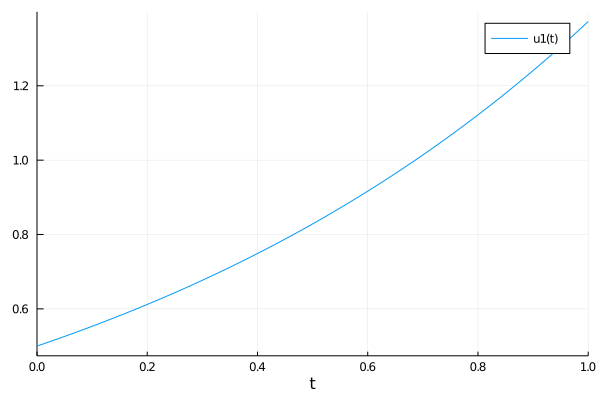

In [7]:
plot(sol)

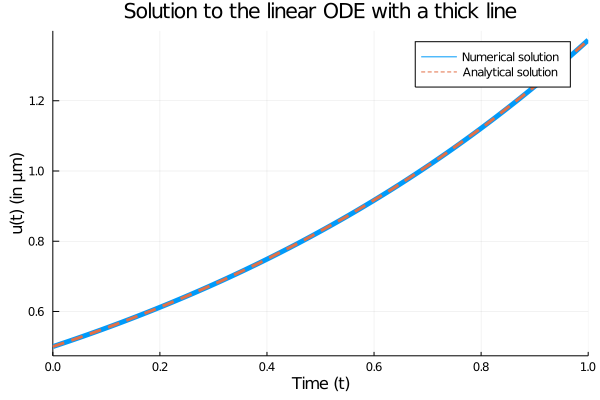

In [8]:
plot(sol,linewidth=5,title="Solution to the linear ODE",
     xaxis="Time (t)",yaxis="u(t) (in μm)",label="Numerical solution")

plot!(sol.t,t->0.5*exp(1.01t),lw=3,ls=:dash,label="Analytical solution")